# Cosine similarities_2
This notebook illustrates how to calculate and display cosine similarities between wordvectors.
As input, we use a file with embeddings generated by [embiggen](https://pypi.org/project/embiggen/]) together
with a file with the corresponding word labels. This notebook  is specifically for the purpose of illustrating the words with highest cosine similatity scores with leukemia and ovarian neopplasms. Also, we illustrate the 3D scatter plot of the top 10 words with highest cos similarity to leukemia and also 10 random words from our corpus.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.spatial.distance import cosine
from collections import defaultdict
from sklearn.cluster import DBSCAN


The following code allows us to import the ``kcet`` module from the local repository.

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from kcet import Wordvec2Cosine

The constructor of ``Wordvec2Cosine`` loads the word embeddings and words into a pandas dataframe.

In [3]:
data_directory = 'data/embeddings_final'
if not os.path.isdir(data_directory):
    raise FileNotFoundError("Could not find data directory")
embedding_file = os.path.join(data_directory, "embedding_SG_dim100_upto2020.npy")
words_file = os.path.join(data_directory, "words_SG_upto2020.txt")
w2c = Wordvec2Cosine(embeddings=embedding_file, words=words_file)
df = w2c.get_embeddings()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
cell,2.892186,-4.601290,1.886768,3.363972,5.323241,2.037415,-4.547163,2.887746,0.078090,-6.857232,...,-2.348537,4.792399,3.246019,-3.045483,-4.771703,6.965374,-1.852824,0.788342,0.692204,8.816134
patient,3.030980,-4.654769,1.988458,3.286587,4.494266,4.335152,-3.879949,1.414752,0.948940,-4.057512,...,-1.655231,5.274243,5.277645,-1.659015,-4.128818,5.872729,-3.746760,1.387476,-0.132648,8.704845
meshd009369,3.125736,-5.037050,1.834232,3.044192,4.652200,3.345147,-2.471191,2.407151,0.459735,-5.215952,...,-1.343417,3.949077,5.909581,-3.753628,-5.255637,6.504014,-3.489765,1.265763,0.166798,9.207653
0,3.207781,-5.854365,2.169951,2.806666,3.704714,4.489932,-3.641227,2.849144,1.368201,-5.305769,...,-1.802601,4.349891,5.042999,-1.330444,-3.057492,6.769782,-4.191097,0.704711,0.271818,7.927824
study,3.093263,-3.081187,1.896351,3.586287,3.835986,3.025896,-3.602392,3.394049,0.388296,-4.770427,...,-1.487065,4.371748,4.851753,-3.033936,-4.145646,6.956510,-3.810457,0.859616,0.380740,8.665388


## Get the MeSH terms that descend from Leukemia

In [4]:
leukemia_descendants = pd.read_csv("data/leukemia.tsv", sep = "\t")["MeSH descriptor"].tolist()
meshd_leukemia = []
for mesh_desciptor in leukemia_descendants:
    meshd = "meshd" + mesh_desciptor[1:]
    meshd_leukemia.append(meshd)
    #print(meshd)

In [5]:
terms_leukemia = []
for term in meshd_leukemia:
    if term in df.index:
        terms_leukemia.append(term)
    
leukemia_descendant_df = df.loc[terms_leukemia]
leukemia_descendant_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
meshd007938,2.521861,-6.099328,1.849605,3.812808,4.508336,3.072927,-4.751568,2.341789,-0.186555,-5.819514,...,-1.428836,3.765262,3.706812,-2.383203,-3.980268,4.148456,-2.785204,-0.194501,1.308736,7.531620
meshd001353,1.030533,-1.913022,1.548065,1.965575,2.021585,2.044276,-2.304335,0.762356,0.033790,-2.757410,...,-0.998049,2.779407,3.186920,-1.573640,-2.377643,3.445080,-2.394229,0.718562,0.262127,5.166907
meshd001752,0.842622,-1.548524,0.476604,1.460867,1.979901,0.761822,-1.677080,0.926773,0.259768,-1.896356,...,-0.517063,1.727278,1.957400,-1.297275,-1.376770,2.234009,-1.138049,0.473188,0.049233,3.813809
meshd004915,2.362579,-4.851604,2.217464,2.840142,2.860316,3.275533,-4.389329,1.393330,-0.076001,-3.477480,...,-0.647204,4.074770,4.737173,-2.314680,-3.556638,4.630733,-3.353567,1.599018,1.531622,6.764244
meshd007939,2.980415,-4.114379,2.434502,3.851788,2.787647,2.781450,-3.615292,2.511206,0.018676,-4.192180,...,-2.195441,4.465626,4.894506,-2.687476,-3.875503,4.592358,-2.622470,0.759136,-0.185249,6.268424


In [6]:
color_leukemia = ["red"]
for i in range(len(terms_leukemia)-1):
    color_leukemia.append("blue")

## Get the MeSH terms that descend from ovarian neoplasms

In [7]:
ovarian_descendants = pd.read_csv("data/ovarianNeoplasms.tsv", sep = "\t")["MeSH descriptor"].tolist()
meshd_ovarian = []
for mesh_desciptor in ovarian_descendants:
    meshd = "meshd" + mesh_desciptor[1:]
    meshd_ovarian.append(meshd)
    #print(meshd)

In [8]:
terms_ovarian = []
for term in meshd_ovarian:
    if term in df.index:
        terms_ovarian.append(term)
    
ovarian_descendant_df = df.loc[terms_ovarian]
ovarian_descendant_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
meshd010051,3.072791,-2.909225,2.060097,4.283984,5.044001,3.521364,-2.625771,2.760182,0.359268,-5.208926,...,-2.067533,4.287587,5.239411,-2.756318,-4.954819,6.051542,-4.532008,0.841578,0.163029,7.852741
meshd000077216,2.953218,-2.924506,2.235753,3.520408,5.433797,2.701469,-3.294727,2.832772,1.040954,-4.847880,...,-2.014151,3.565517,5.502385,-2.904055,-4.857262,6.737767,-4.803393,1.434961,0.291188,7.652975
meshd001948,2.114845,-3.445855,1.451699,1.565399,3.261432,3.478113,-2.297478,1.319301,-0.269439,-4.683348,...,-1.149413,3.438398,3.891533,-1.993584,-2.719943,3.982745,-4.441090,0.150367,0.339359,6.288504
meshd006106,2.453123,-3.225351,2.230294,2.072668,3.829018,3.777840,-2.520633,2.707639,0.578923,-4.629045,...,-1.835440,4.750452,4.482211,-2.425702,-3.002339,4.658401,-4.252470,1.110849,0.992910,7.294141
meshd008539,0.803067,-1.330232,0.654609,1.323322,1.445127,1.163081,-1.423022,0.913188,0.238121,-1.911834,...,-0.472482,1.530111,1.661097,-1.086506,-1.399170,1.991800,-1.244199,0.338743,0.002728,3.760147


In [9]:
color_ovarian = ["magenta"]
for i in range(len(terms_ovarian)-1):
    color_ovarian.append("green")

In [10]:
cvec = color_leukemia + color_ovarian

print(cvec)

['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'magenta', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green']


In [11]:
frames = [leukemia_descendant_df, ovarian_descendant_df]
leukemia_ovarian_df = pd.concat(frames)

In [12]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(leukemia_ovarian_df.values)
df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.7234635  0.0911063  0.03711759]


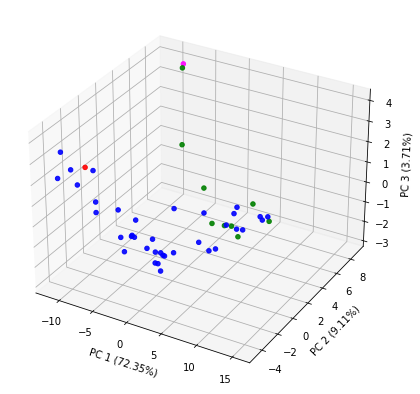

In [13]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(pca_result[:,0], pca_result[:,1], pca_result[:,2], color = cvec,alpha=0.9)
#plt.title("3D scatter plot")
ax.set_xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100)) 
ax.set_ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 
ax.set_zlabel('PC 3 (%.2f%%)' % (pca.explained_variance_ratio_[2]*100))
 
# show plot
plt.show()

Text(0, 0.5, 'PC 2 (9.11%)')

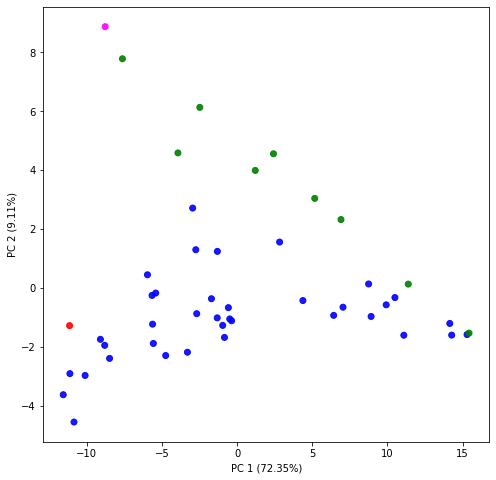

In [14]:
plt.figure(figsize=(8,8))

plt.scatter(pca_result[:,0],pca_result[:,1] ,c=cvec, alpha=0.9)
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100)) 

## Get all cosine similarites between leukemia and all words 
We retrieve the top n most similar words. The function ``n_most_similar_words`` returns a list of tuples,
and ``n_most_similar_words_df`` returns a Pandas dataframe.

In [ ]:
target_word ='meshd007938' # Leukemia Leukemias
n=df.shape[0]
all_cosine_similarities_leukemia = w2c.n_most_similar_words_df(target_word=target_word, n=n)

In [ ]:
all_cosine_similarities_leukemia.head(n=6) #top 5 words which have highest cosine similarity scores between Leukemia and other words

## Get all cosine similarites between ovarian neoplasms and all words 
We retrieve the top n most similar words. The function ``n_most_similar_words`` returns a list of tuples,
and ``n_most_similar_words_df`` returns a Pandas dataframe.

In [ ]:
target_word ='meshd010051' # ovarian neoplasms
n=df.shape[0]
all_cosine_similarities_ovarian_neoplasms = w2c.n_most_similar_words_df(target_word=target_word, n=n)

In [ ]:
all_cosine_similarities_ovarian_neoplasms.head(n=6) #top 5 words which have highest cosine similarity scores between ovarian neoplasms and other words
